## 라이브러리 임포트

In [2]:
# Library import - data preprocessing 
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder

In [3]:
## Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [4]:
# torch
import torch 

In [5]:
# 평가지표
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_error
from scipy.stats import spearmanr

In [6]:
# visulazation
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [7]:
# font manager
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [8]:
# tqdm
from tqdm import tqdm

In [9]:
# kaggle hub
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [10]:
## GPU check
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("사용중인 디바이스:", device)

사용중인 디바이스: cuda


In [11]:
print("CUDA 사용 가능?", torch.cuda.is_available())
if torch.cuda.is_available():
    print("사용 중인 GPU:", torch.cuda.get_device_name(0))
else:
    print("GPU를 사용할 수 없습니다.")

CUDA 사용 가능? True
사용 중인 GPU: NVIDIA GeForce MX450


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
import re

In [14]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

In [18]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 812.7 kB/s eta 0:00:16
     --------------------------------------- 0.1/12.8 MB 930.9 kB/s eta 0:00:14
      --------------------------------------- 0.2/12.8 MB 1.1 MB/s eta 0:00:12
      --------------------------------------- 0.2/12.8 MB 1.1 MB/s eta 0:00:12
      --------------------------------------- 0.3/12.8 MB 1.1 MB/s eta 0:00:12
      --------------------------------------- 0.3/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.4/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.4/12.8 MB 1.1 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 1.1 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 1.2 MB


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import spacy
nlp = spacy.load("en_core_web_sm")

## Data Load

In [22]:
# 파일 경로
file_path = r"C:\Users\wonny\OneDrive\바탕 화면\경희대학교\Machine Learning\Team PJ\data\Youtube_Game2_10000.csv"

# 데이터 로드
df = pd.read_csv(file_path)

In [23]:
df.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,date,keyword
0,C6PrhsZ4dLI,Play Game#Kritikachannel#Shorts funny video,Kritika Channel,22,[none],1261217614,16207795,0,0,https://i.ytimg.com/vi/C6PrhsZ4dLI/default.jpg,29.10,game
1,0e3GPea1Tyg,"$456,000 Squid Game In Real Life!",MrBeast,24,[none],804577951,19234279,0,628015,https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg,24.11,game
2,jBOyUo3JaiA,Vlad and story about Worms from the game,Vlad and Niki,24,Vlad|for kids|vlad and nikita|toys|playing|gam...,562644972,1652861,0,0,https://i.ytimg.com/vi/jBOyUo3JaiA/default.jpg,24.05,game
3,yGKhcLK482Y,Squid Game Dalgona #shorts,Mr DegrEE,22,shorts|squid game|funny|mr degree|mariana|mari...,471345780,2619112,0,2969,https://i.ytimg.com/vi/yGKhcLK482Y/default.jpg,22.05,game
4,iBh3zOjOCvI,Jelly Bean Guessing Game HACK,Mark Rober,28,[none],240356873,6154177,0,20292,https://i.ytimg.com/vi/iBh3zOjOCvI/default.jpg,30.04,game


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13906 entries, 0 to 13905
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        13906 non-null  object 
 1   title           13906 non-null  object 
 2   channel_title   13906 non-null  object 
 3   category_id     13906 non-null  int64  
 4   tags            13906 non-null  object 
 5   views           13906 non-null  int64  
 6   likes           13906 non-null  int64  
 7   dislikes        13906 non-null  int64  
 8   comment_count   13906 non-null  int64  
 9   thumbnail_link  13906 non-null  object 
 10  date            13906 non-null  float64
 11  keyword         13906 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.3+ MB


## Data preprocessing

### function definition

In [25]:
def preprocess_title(text):
    if not isinstance(text, str):
        return ""

    # 1. 소문자 변환
    text = text.lower()

    # 2. 특수문자, 숫자 제거
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy 형태소 분석
    doc = nlp(text)

    # 4. 명사/형용사 + 불용어 제거 + 원형 복원
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)


In [26]:
def preprocess_description(text):
    if not isinstance(text, str):
        return ""

    # 1. 소문자 변환
    text = text.lower()

    # 2. 특수문자, 숫자 제거 (알파벳만 남김)
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy 분석
    doc = nlp(text)

    # 4. 불용어 제거 + 명사/형용사 + 원형 복원
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)

In [27]:
def count_pos(text):
    if not isinstance(text, str):
        return {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    doc = nlp(text.lower())
    pos_counts = {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    for token in doc:
        if token.pos_ in pos_counts:
            pos_counts[token.pos_] += 1

    return pos_counts

In [28]:
def extract_common_words(row):
    title_words = set(row['cleaned_title'].split())
    desc_words = set(row['cleand_desc'].split())
    common = title_words & desc_words  # 교집합
    return ' '.join(common) if common else ''

### target scaling

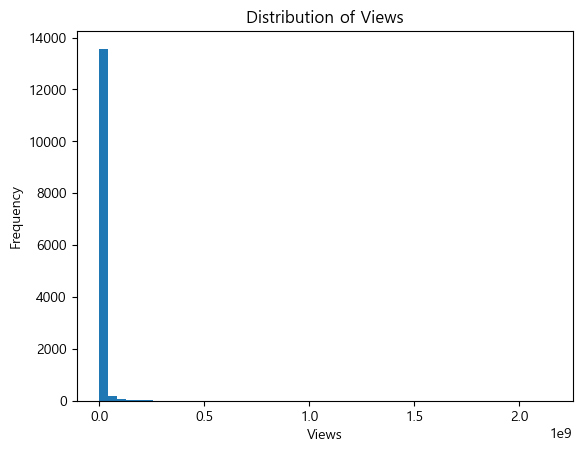

In [30]:
# target 분포 확인 
plt.hist(df['views'], bins=50)
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.title('Distribution of Views')
plt.show()

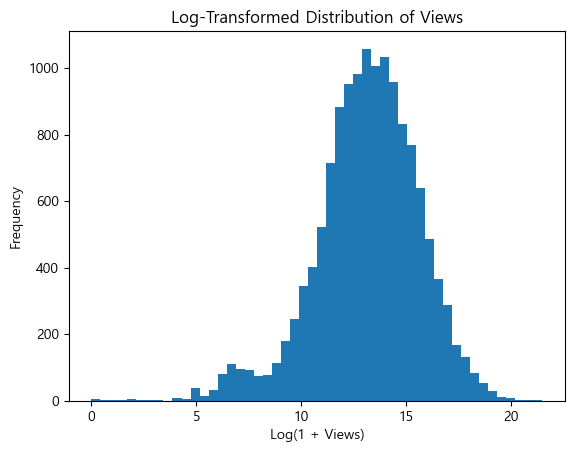

In [31]:
# target log scaling 
df['log_views'] = np.log1p(df['views'])

plt.hist(df['log_views'], bins=50)
plt.xlabel('Log(1 + Views)')
plt.ylabel('Frequency')
plt.title('Log-Transformed Distribution of Views')
plt.show()

In [32]:
# log_views 열을 표준화
scaler = StandardScaler()
df['log_views_scaled'] = scaler.fit_transform(df[['log_views']])

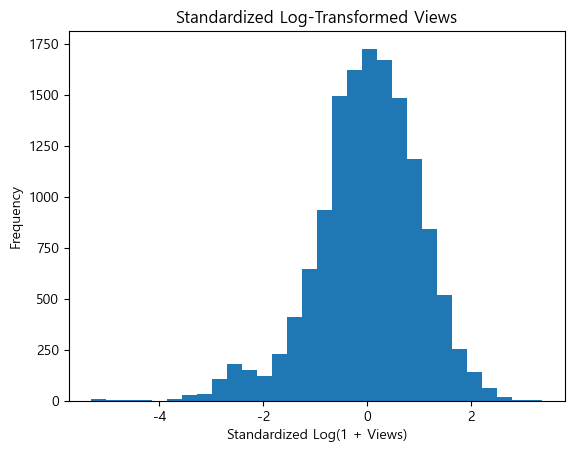

In [34]:
plt.hist(df['log_views_scaled'], bins=30)
plt.title("Standardized Log-Transformed Views")
plt.xlabel("Standardized Log(1 + Views)")
plt.ylabel("Frequency")
plt.show()

### 제목 전처리 

In [35]:
df['cleaned_title'] = df['title'].apply(preprocess_title)

In [38]:
df.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,date,keyword,log_views,log_views_scaled,cleaned_title
0,C6PrhsZ4dLI,Play Game#Kritikachannel#Shorts funny video,Kritika Channel,22,[none],1261217614,16207795,0,0,https://i.ytimg.com/vi/C6PrhsZ4dLI/default.jpg,29.10,game,20.955343,3.150488,play gamekritikachannelshort funny video
1,0e3GPea1Tyg,"$456,000 Squid Game In Real Life!",MrBeast,24,[none],804577951,19234279,0,628015,https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg,24.11,game,20.505828,2.969093,squid game real life
2,jBOyUo3JaiA,Vlad and story about Worms from the game,Vlad and Niki,24,Vlad|for kids|vlad and nikita|toys|playing|gam...,562644972,1652861,0,0,https://i.ytimg.com/vi/jBOyUo3JaiA/default.jpg,24.05,game,20.148159,2.824761,vlad story worm game
3,yGKhcLK482Y,Squid Game Dalgona #shorts,Mr DegrEE,22,shorts|squid game|funny|mr degree|mariana|mari...,471345780,2619112,0,2969,https://i.ytimg.com/vi/yGKhcLK482Y/default.jpg,22.05,game,19.971103,2.753312,squid game dalgona short
4,iBh3zOjOCvI,Jelly Bean Guessing Game HACK,Mark Rober,28,[none],240356873,6154177,0,20292,https://i.ytimg.com/vi/iBh3zOjOCvI/default.jpg,30.04,game,19.297635,2.481544,jelly bean guess game hack


### 품사별 count

In [39]:
# 각 제목에서 품사별 개수 추출
pos_df = df['title'].apply(count_pos).apply(pd.Series)

# 기존 df와 합치기
df = pd.concat([df, pos_df], axis=1)

In [40]:
df

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,...,keyword,log_views,log_views_scaled,cleaned_title,NOUN,PROPN,ADJ,VERB,INTJ,NUM
0,C6PrhsZ4dLI,Play Game#Kritikachannel#Shorts funny video,Kritika Channel,22,[none],1261217614,16207795,0,0,https://i.ytimg.com/vi/C6PrhsZ4dLI/default.jpg,...,game,20.955343,3.150488,play gamekritikachannelshort funny video,1,1,1,1,0,0
1,0e3GPea1Tyg,"$456,000 Squid Game In Real Life!",MrBeast,24,[none],804577951,19234279,0,628015,https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg,...,game,20.505828,2.969093,squid game real life,2,0,2,0,0,1
2,jBOyUo3JaiA,Vlad and story about Worms from the game,Vlad and Niki,24,Vlad|for kids|vlad and nikita|toys|playing|gam...,562644972,1652861,0,0,https://i.ytimg.com/vi/jBOyUo3JaiA/default.jpg,...,game,20.148159,2.824761,vlad story worm game,3,0,1,0,0,0
3,yGKhcLK482Y,Squid Game Dalgona #shorts,Mr DegrEE,22,shorts|squid game|funny|mr degree|mariana|mari...,471345780,2619112,0,2969,https://i.ytimg.com/vi/yGKhcLK482Y/default.jpg,...,game,19.971103,2.753312,squid game dalgona short,4,0,1,0,0,0
4,iBh3zOjOCvI,Jelly Bean Guessing Game HACK,Mark Rober,28,[none],240356873,6154177,0,20292,https://i.ytimg.com/vi/iBh3zOjOCvI/default.jpg,...,game,19.297635,2.481544,jelly bean guess game hack,3,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13901,wJ-IKNMqaxA,The BIGGEST Devs Listened Moment in Gacha Gami...,Aithoma,20,wuthering waves|genshin impact|zenless zone ze...,7012,339,0,168,https://i.ytimg.com/vi/wJ-IKNMqaxA/default.jpg,...,gacha game,8.855521,-1.732216,big devs listen moment gacha gaming,3,1,1,1,0,0
13902,qGQ2o4me2zo,She is my favorite character from Dandy's Word...,Lunny,22,[none],13891,347,0,24,https://i.ytimg.com/vi/qGQ2o4me2zo/default.jpg,...,gacha game,9.539068,-1.456380,favorite character dandys word twisted toodle ...,5,1,1,1,0,0
13903,P7kHoa5NZ8A,Hahahaha!/Emoticon #gacha #gachaclub #shorts,𝐾𝑖𝑎𝑟𝑎 키아라🗝,1,[none],7012,792,0,0,https://i.ytimg.com/vi/P7kHoa5NZ8A/default.jpg,...,gacha game,8.855521,-1.732216,hahahahaemoticon gacha gachaclub short,4,0,1,0,0,0
13904,Bw5d58X_6JQ,This NEW Gacha game is secretly using AI!,Faudiedauw,20,[none],7795,561,0,166,https://i.ytimg.com/vi/Bw5d58X_6JQ/default.jpg,...,gacha game,8.961366,-1.689504,new gacha game secretly ai,1,1,2,1,0,0


### 조회수 상위 영상에서 자주 등장하는 단어 확인

--------------------------------------------------------------------------------------------------------

조회수가 높은 영상들에서 자주 등장하는 단어 확인하기 (tf-idf)

In [42]:
# 조회수 기준 상위 영상 vs 하위 영상 비교 
top_df = df[df['views'] >= df['views'].quantile(0.90)].copy()
bottom_df = df[df['views'] >= df['views'].quantile(0.10)].copy()

In [43]:
## tf-idf
# 벡터화 객체 생성
vectorizer = TfidfVectorizer(
    stop_words='english',      # 영어 불용어 제거
    max_features=1000,         # 상위 5000개의 단어만 사용
    ngram_range=(1, 2)         # unigram + bigram 사용
)

In [44]:
# 벡터화 수행
X_tfidf = vectorizer.fit_transform(top_df['cleaned_title'])

# 단어 목록 추출
tfidf_words = vectorizer.get_feature_names_out()

In [45]:
# 단어별 TF-IDF 점수 합계 구하기
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# 상위 30개 단어 보기
print(tfidf_df.head(30))

              word      score
271           game  84.759379
550      minecraft  64.302628
790          short  56.642601
724         roblox  39.894311
35          arcade  33.918963
833       speedrun  31.338759
940          video  30.470087
855          squid  27.692151
856     squid game  24.770694
779        shooter  23.124170
741            rpg  20.969622
941     video game  19.339247
62          battle  18.634080
980          world  18.122991
318         gaming  18.060417
260          funny  17.232360
625       nintendo  15.948966
500            lol  15.666199
614            new  15.631883
309       gameplay  15.195152
738         royale  15.080076
765         second  13.222922
347           good  12.580424
825           song  12.460571
65   battle royale  12.372948
666           play  12.172192
28       animation  12.087143
116      challenge  11.939200
394         horror  11.892535
634       official  11.866821


-----------------------------------------------------------------------------------------------------------

전체 데이터에서 출현 빈도가 높은 단어들 확인하기 (countvectorizer) 

In [46]:
#CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_counts = vectorizer.fit_transform(top_df['cleaned_title']) 

# 단어별 빈도 계산
word_counts = X_counts.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

# 정리
count_df = pd.DataFrame({'word': words, 'count': word_counts})
count_df = count_df.sort_values('count', ascending=False)

In [50]:
count_df[count_df['count']>50]

,word,count
326,game,453
794,short,271
563,minecraft,188
736,roblox,101
836,squid,100
32,arcade,96
948,video,96
824,speedrun,86
791,shooter,73
315,funny,64


----------------------------------------------------------------------------------------------------------

In [48]:
keywords = [
        'rank', 'op', 'patch', 'update', 'buff', 'nerf', 'new', 'epic',
        'trick', 'tips', 'glitch', 'record', 'kill', 'highlight', 'champion',
        'trailer', 'royale', 'official', 'reveal', 'black', 'multiplayer',
]

pattern = r'\b(?:' + '|'.join(keywords) + r')\b'

df['has_rank_related'] = df['title'].str.lower().str.contains(pattern)

In [49]:
df['has_rank_related'].sum()

np.int64(1860)

### 조회수 상위 / 하위 영상 비교 

In [67]:
# 벡터화 수행
X_tfidf = vectorizer.fit_transform(top_df['cleaned_title'])

# 단어 목록 추출
tfidf_words = vectorizer.get_feature_names_out()

# 단어별 TF-IDF 점수 합계 구하기
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# 상위 20개 단어 보기
print(tfidf_df.head(30))

              word      score
271           game  84.759379
550      minecraft  64.302628
790          short  56.642601
724         roblox  39.894311
35          arcade  33.918963
833       speedrun  31.338759
940          video  30.470087
855          squid  27.692151
856     squid game  24.770694
779        shooter  23.124170
741            rpg  20.969622
941     video game  19.339247
62          battle  18.634080
980          world  18.122991
318         gaming  18.060417
260          funny  17.232360
625       nintendo  15.948966
500            lol  15.666199
614            new  15.631883
309       gameplay  15.195152
738         royale  15.080076
765         second  13.222922
347           good  12.580424
825           song  12.460571
65   battle royale  12.372948
666           play  12.172192
28       animation  12.087143
116      challenge  11.939200
394         horror  11.892535
634       official  11.866821


In [66]:
# 벡터화 수행
X_tfidf = vectorizer.fit_transform(bottom_df['cleaned_title'])

# 단어 목록 추출
tfidf_words = vectorizer.get_feature_names_out()

# 단어별 TF-IDF 점수 합계 구하기
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# 상위 20개 단어 보기
print(tfidf_df.head(30))

                word       score
282             game  821.545940
733              rpg  367.634344
779            short  355.221012
552        minecraft  316.273404
258              fps  276.802858
719           roblox  257.722762
937         valorant  251.294053
334           gaming  236.489383
975            world  235.206736
608         nintendo  220.256615
366             good  212.302918
819         speedrun  197.845898
652             play  195.007531
596              new  193.974173
774          shooter  190.911204
36            arcade  190.865225
873           switch  188.135878
421           horror  173.698394
764            setup  170.843647
628             open  168.812465
629       open world  159.232409
274            gacha  157.172431
943            video  155.380719
54            battle  151.375055
610  nintendo switch  151.027924
570           mobile  146.309603
422      horror game  141.995383
730           royale  141.330527
638               pc  140.939414
325       

### clustering

In [55]:
## 클러스터링 
titles = df['cleaned_title']

#TF-IDF 벡터화
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=1000,
    ngram_range=(1, 2)
)
X_tfidf = vectorizer.fit_transform(titles)

#단어 벡터 추출 (문서-단어 행렬 전치 → 단어 x 문서 행렬)
X_words = X_tfidf.T

#KMeans 클러스터링
n_clusters = 5  # 군집 수는 실험하면서 조정 가능
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
word_labels = kmeans.fit_predict(X_words)

#클러스터 결과 정리
words = vectorizer.get_feature_names_out()
cluster_df = pd.DataFrame({'word': words, 'cluster': word_labels})

#클러스터별 단어 리스트 확인
cluster_groups = cluster_df.groupby('cluster')['word'].apply(list).reset_index(name='words')

#클러스터별 단어 출력
for idx, row in cluster_groups.iterrows():
    print(f"📌 Cluster {row['cluster']}:")
    print(", ".join(row['words']))
    print("-" * 50)

📌 Cluster 0:
aaa, accessory, ace, action, active, actually, ad, ad review, add, adventure, age, age ape, agent, ai, aku, albion, albiononline, alpha, alpha season, amazing, amazon, america, android, android game, android gameplay, android good, android high, android io, android ios, android short, androidio, animal, animation, anime, ape, ape ad, ape short, app, april, arcade duncan, arcade fnaf, arcade game, arena, army, art, asmr, atlan, attack, audio, auto, awesome, baby, bad, bad fighting, ball, ban, base, baseball, bassball, battle, battle royal, battle royale, battle simulator, battlefield, bear, beat, beginner, bgmi, bharti, bharti singh, big, bike, bike drive, bike game, black, blg, blood, blue, bmp, bodycam, boost, boss, box, boy, brainrot, brainrot speedrun, brawl, brawl star, brawlstar, break, bro, brookhaven, budget, build dream, building, bus, buy, car, car game, cara, card, cartoon, cat, ce, challenge, champion, championship, change, chapter, character, charlie, cheap, ch

In [58]:
#제목, 단어 클러스터, 조회수 데이터 준비
titles = df['cleaned_title'].astype(str).tolist()
views = df['views'].tolist()
word_cluster_map = dict(zip(cluster_df['word'], cluster_df['cluster']))  # 단어 → 클러스터번호

#제목별 포함된 클러스터 목록 만들기
title_clusters = []

for title in titles:
    found_clusters = set()
    for word in word_cluster_map:
        if word in title:
            found_clusters.add(word_cluster_map[word])
    title_clusters.append(list(found_clusters))

#각 클러스터 번호 기준으로 해당되는 조회수 모으기
cluster_to_views = {}

for clusters, view in zip(title_clusters, views):
    for c in clusters:
        if c not in cluster_to_views:
            cluster_to_views[c] = []
        cluster_to_views[c].append(view)

#평균 조회수 계산
cluster_avg_views = {
    c: np.mean(vlist) for c, vlist in cluster_to_views.items() if len(vlist) > 0
}

#결과 출력
for c, avg in sorted(cluster_avg_views.items()):
    print(f"📊 Cluster {c} - 평균 조회수: {round(avg):,}회")

📊 Cluster 0 - 평균 조회수: 5,521,832회
📊 Cluster 1 - 평균 조회수: 12,194,151회
📊 Cluster 2 - 평균 조회수: 2,530,507회
📊 Cluster 3 - 평균 조회수: 4,849,262회
📊 Cluster 4 - 평균 조회수: 13,264,122회


### 조회수 구간별 제목 길이 및 단어 수

In [59]:
# 단어 수 계산
df['title_cnt'] = df['cleaned_title'].apply(lambda x: len(x.split()))

# 확인
df.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,...,log_views_scaled,cleaned_title,NOUN,PROPN,ADJ,VERB,INTJ,NUM,has_rank_related,title_cnt
0,C6PrhsZ4dLI,Play Game#Kritikachannel#Shorts funny video,Kritika Channel,22,[none],1261217614,16207795,0,0,https://i.ytimg.com/vi/C6PrhsZ4dLI/default.jpg,...,3.150488,play gamekritikachannelshort funny video,1,1,1,1,0,0,False,4
1,0e3GPea1Tyg,"$456,000 Squid Game In Real Life!",MrBeast,24,[none],804577951,19234279,0,628015,https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg,...,2.969093,squid game real life,2,0,2,0,0,1,False,4
2,jBOyUo3JaiA,Vlad and story about Worms from the game,Vlad and Niki,24,Vlad|for kids|vlad and nikita|toys|playing|gam...,562644972,1652861,0,0,https://i.ytimg.com/vi/jBOyUo3JaiA/default.jpg,...,2.824761,vlad story worm game,3,0,1,0,0,0,False,4
3,yGKhcLK482Y,Squid Game Dalgona #shorts,Mr DegrEE,22,shorts|squid game|funny|mr degree|mariana|mari...,471345780,2619112,0,2969,https://i.ytimg.com/vi/yGKhcLK482Y/default.jpg,...,2.753312,squid game dalgona short,4,0,1,0,0,0,False,4
4,iBh3zOjOCvI,Jelly Bean Guessing Game HACK,Mark Rober,28,[none],240356873,6154177,0,20292,https://i.ytimg.com/vi/iBh3zOjOCvI/default.jpg,...,2.481544,jelly bean guess game hack,3,0,1,1,0,0,False,5


In [60]:
# 제목 길이 계산 
df['title_len'] = df['title'].apply(lambda x: len(x))

# 확인
df.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,...,cleaned_title,NOUN,PROPN,ADJ,VERB,INTJ,NUM,has_rank_related,title_cnt,title_len
0,C6PrhsZ4dLI,Play Game#Kritikachannel#Shorts funny video,Kritika Channel,22,[none],1261217614,16207795,0,0,https://i.ytimg.com/vi/C6PrhsZ4dLI/default.jpg,...,play gamekritikachannelshort funny video,1,1,1,1,0,0,False,4,43
1,0e3GPea1Tyg,"$456,000 Squid Game In Real Life!",MrBeast,24,[none],804577951,19234279,0,628015,https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg,...,squid game real life,2,0,2,0,0,1,False,4,33
2,jBOyUo3JaiA,Vlad and story about Worms from the game,Vlad and Niki,24,Vlad|for kids|vlad and nikita|toys|playing|gam...,562644972,1652861,0,0,https://i.ytimg.com/vi/jBOyUo3JaiA/default.jpg,...,vlad story worm game,3,0,1,0,0,0,False,4,40
3,yGKhcLK482Y,Squid Game Dalgona #shorts,Mr DegrEE,22,shorts|squid game|funny|mr degree|mariana|mari...,471345780,2619112,0,2969,https://i.ytimg.com/vi/yGKhcLK482Y/default.jpg,...,squid game dalgona short,4,0,1,0,0,0,False,4,26
4,iBh3zOjOCvI,Jelly Bean Guessing Game HACK,Mark Rober,28,[none],240356873,6154177,0,20292,https://i.ytimg.com/vi/iBh3zOjOCvI/default.jpg,...,jelly bean guess game hack,3,0,1,1,0,0,False,5,29


-----------------------------------------------------------------------------------------------------------

조회수 구간별로 평균값에 차이가 있는지 확인

In [61]:
# 구간 5구간으로 분할 
df['views_bin'] = pd.qcut(df['views'], q=3, labels=[1,2,3])

In [62]:
grouped = df.groupby('views_bin').agg({
    'title_cnt': 'mean',
    'views': 'mean',
    'title_cnt' : 'mean',
    'title_len' : 'mean'
}).reset_index()

print(grouped)

  views_bin  title_cnt         views  title_len
0         1   6.815750  7.781510e+04  62.078533
1         2   6.547357  6.866829e+05  57.259331
2         3   6.330457  1.578271e+07  54.644090


C:\Users\wonny\AppData\Local\Temp\ipykernel_24052\1109606012.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('views_bin').agg({


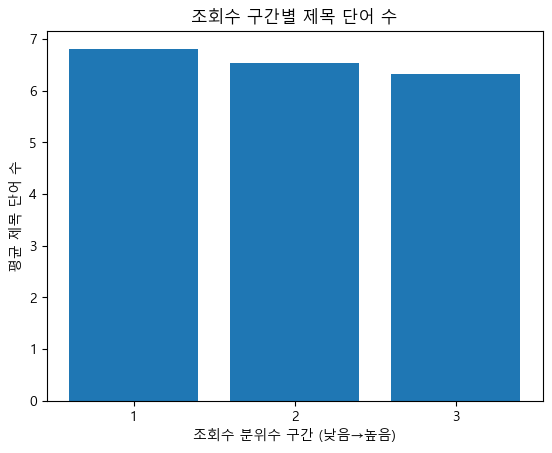

In [63]:
plt.bar(grouped['views_bin'].astype(str), grouped['title_cnt'])
plt.xlabel('조회수 분위수 구간 (낮음→높음)')
plt.ylabel('평균 제목 단어 수')
plt.title('조회수 구간별 제목 단어 수')
plt.show()

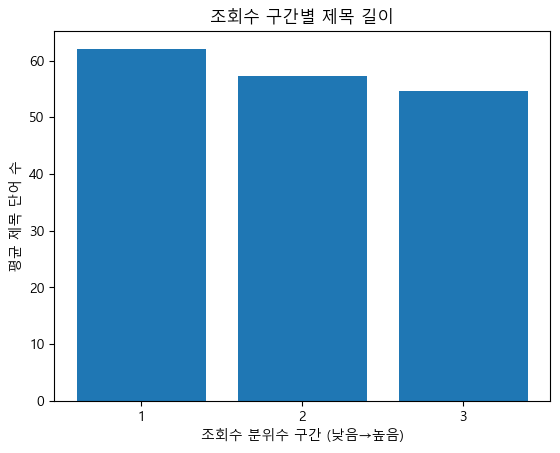

In [64]:
plt.bar(grouped['views_bin'].astype(str), grouped['title_len'])
plt.xlabel('조회수 분위수 구간 (낮음→높음)')
plt.ylabel('평균 제목 단어 수')
plt.title('조회수 구간별 제목 길이')
plt.show()

In [65]:
# 분위수 구간별로 title_cnt 분리
group1 = df[df['views_bin'] == 1]['title_cnt']
group2 = df[df['views_bin'] == 2]['title_cnt']
group3 = df[df['views_bin'] == 3]['title_cnt']

# ANOVA 테스트
f_stat, p_val = f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

NameError: name 'f_oneway' is not defined

### description과 title에 겹치는 단어 있는지 확인

In [153]:
game_df

,title,views,likes,description,log_views,log_views_scaled,cleaned_title,cleand_desc,NOUN,PROPN,ADJ,VERB,INTJ,NUM,has_rank_related,title_cnt,title_len,views_bin
131,L.A. Noire - Nintendo Switch Trailer,154872,7683,Amid the post-war boom of Hollywood's Golden A...,11.950361,-1.291706,la noire nintendo switch trailer,postwar boom hollywood golden age cole phelp l...,2,4,0,0,0,0,True,5,36,1
392,L.A. Noire - Nintendo Switch Trailer,161231,7803,Amid the post-war boom of Hollywood's Golden A...,11.990600,-1.265922,la noire nintendo switch trailer,postwar boom hollywood golden age cole phelp l...,2,4,0,0,0,0,True,5,36,1
405,Our First Date,224426,17784,Here's an animation short of our First Date! W...,12.321306,-1.054013,date,here animation short date excited hear think l...,1,0,1,0,0,0,False,1,14,1
619,Our First Date,463992,25840,Here's an animation short of our First Date! W...,13.047625,-0.588606,date,here animation short date excited hear think l...,1,0,1,0,0,0,False,1,14,1
652,Playing CUPHEAD with MatPat!,55460,3871,"After my appearance on GTLive, MatPat (Game Th...",10.923435,-1.949735,play cuphead matpat,appearance gtlive matpat game theory play cuph...,1,1,0,1,0,0,False,3,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40874,"Pokémon: Let's Go, Pikachu! and Pokémon: Let's...",9992803,230507,Return to the Kanto region and experience a cl...,16.117376,1.378417,pokmon let pikachu pokmon let eevee trailer,return kanto region experience classic pokmon ...,2,3,0,4,0,0,True,7,65,3
40911,The Sims 4 Seasons: Official Reveal Trailer,1749832,77408,Add weather to your Sims’ lives to tell new st...,14.375031,0.261964,sims season official reveal trailer,add weather sim live tell new story enjoy seas...,3,0,1,1,0,1,True,5,43,2
40919,The History of Fortnite Battle Royale - Did Yo...,324219,7840,Thanks to Skillshare for sponsoring this video...,12.689178,-0.818290,history fortnite battle royale know game feat ...,thank skillshare sponsor video people sign lin...,4,1,1,2,0,0,True,8,72,1
40936,LIE DETECTOR TEST WITH MY GIRLFRIEND!,3229540,109945,Talia: https://www.youtube.com/user/nataliahad...,14.987851,0.654644,lie detector test girlfriend,talia httpswwwyoutubecomusernataliahaddockjosh...,4,0,0,0,0,0,False,4,37,3


In [155]:
# 겹치는 단어 탐색
game_df['common_words'] = game_df.apply(extract_common_words, axis=1)

In [156]:
# 개수까지 같이 세기
game_df['n_common_words'] = game_df['common_words'].apply(lambda x: len(x.split()) if x else 0)

In [158]:
game_df['n_common_words']

131      4
392      4
405      1
619      1
652      2
        ..
40874    4
40911    0
40919    6
40936    0
40948    4
Name: n_common_words, Length: 817, dtype: int64

In [169]:
# 조회수 구간에 따라 차이가 있는지 확인 
grouped = game_df.groupby('views_bin').agg({
    'views' : 'mean',
    'n_common_words': 'mean',
    'NOUN' : 'mean',
    'PROPN' : 'mean',
    'VERB' : 'mean',
    'INTJ' : 'mean',
    'NUM' : 'mean'
}).reset_index()

print(grouped)

  views_bin         views  n_common_words      NOUN     PROPN      VERB  INTJ  \
0         1  3.300992e+05        3.032967  2.604396  1.637363  0.769231   0.0   
1         2  1.630028e+06        2.338235  2.691176  1.073529  0.779412   0.0   
2         3  5.910787e+06        2.959559  3.474265  0.591912  0.852941   0.0   

        NUM  
0  0.472527  
1  0.352941  
2  0.312500  


C:\Users\wonny\AppData\Local\Temp\ipykernel_22328\2622363220.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = game_df.groupby('views_bin').agg({


-----------------------------------------------------------------------------------------------------------

### 최종 예측

------------------------------------------------------------------------------------------------------

키워드 사전 구축

In [68]:
# 조회수가 높은 영상에 자주 등장하는 키워드 사전 구축 
keywords = [
        'rank', 'op', 'patch', 'update', 'buff', 'nerf', 'new', 'epic',
        'trick', 'tips', 'glitch', 'record', 'kill', 'highlight', 'champion',
        'trailer', 'royale', 'official', 'reveal', 'black', 'multiplayer',
    'shooter', 'video', 'short', 'funny', 'battle', 'rpg', 'world', 'gaming',
    'funny', 'arcade'
]

hype_words = ['insane', 'crazy', 'unbelievable', 'god', '1v5', 'clutch']

특징 추출 함수 정의

In [84]:
def extract_features(row):
    features = {}

    # 원본 텍스트
    title = row['title'] if isinstance(row['title'], str) else ''

    # 전처리된 텍스트
    cleaned_title = preprocess_title(title)

    # 제목 길이 및 단어 수 
    features['title_len'] = len(title)
    features['title_cnt'] = len(cleaned_title.split())

    # 느낌표 / 물음표 개수
    features['num_exclamations'] = title.count('!')
    features['num_questions'] = title.count('?')

    # 숫자 포함 여부 
    features['has_number'] = int(bool(re.search(r'\d', title)))
    features['starts_with_number'] = int(bool(re.match(r'^\d', title.strip())))  

    # 키워드 포함 여부 
    keywords = [
        'rank', 'op', 'patch', 'update', 'buff', 'nerf', 'new', 'epic',
        'trick', 'tips', 'glitch', 'record', 'kill', 'highlight', 'champion',
        'trailer', 'royale', 'official', 'reveal', 'black', 'multiplayer'
    ]
    features['has_keyword'] = int(any(word in cleaned_title for word in keywords))

    # 대문자 비율 30% 이상 여부
    features['is_caps_heavy'] = int(sum(1 for c in title if c.isupper()) > len(title) * 0.3)

    # 품사 카운트
    pos_counts = count_pos(title)
    features.update(pos_counts)

    return features


점수 계산 함수 정의

In [77]:
def compute_rule_score(features):
    score = 0

    # 1. 제목 길이: 짧을수록 가산점
    score += -0.03 * features['title_len']

    # 2. 단어 수: 
    score -= 0.3 * features['title_cnt']

    # 3. 느낌표 / 물음표 개수
    score += 0.3 * features['num_exclamations']
    score += 0.3 * features['num_questions']

    # 4. 숫자 포함 여부
    score += 0.5 * features['has_number']

    # 5. 숫자로 시작
    score -= 0.1 * features['starts_with_number']

    # 6. 키워드 포함 여부
    score += 0.8 * features['has_keyword']

    # 7. 대문자 비율이 높은 경우
    score -= 0.3 * features['is_caps_heavy']

    # 8. 품사 기반: 명사·동사 많으면 내용 풍부, 고유명사 많으면 오히려 일반성↓
    score += 0.8 * features.get('NOUN', 0)
    score += 0.5 * features.get('VERB', 0)
    score += -0.1 * features.get('PROPN', 0)  # 고유명사 많으면 가중치 낮춤

    return score

실제 적용할 데이터에서 사용할 칼럼만 불러오기

In [78]:
game = df[['title', 'views']].copy()

타겟 스케일링

In [79]:
# target scaling
game['log_views'] = np.log1p(game['views'])

scaler = StandardScaler()
game['scaled_views'] = scaler.fit_transform(game[['log_views']])

In [80]:
game = game.drop(columns = ['views', 'log_views'])
game

,title,scaled_views
0,Play Game#Kritikachannel#Shorts funny video,3.150488
1,"$456,000 Squid Game In Real Life!",2.969093
2,Vlad and story about Worms from the game,2.824761
3,Squid Game Dalgona #shorts,2.753312
4,Jelly Bean Guessing Game HACK,2.481544
...,...,...
13901,The BIGGEST Devs Listened Moment in Gacha Gami...,-1.732216
13902,She is my favorite character from Dandy's Word...,-1.456380
13903,Hahahaha!/Emoticon #gacha #gachaclub #shorts,-1.732216
13904,This NEW Gacha game is secretly using AI!,-1.689504


In [81]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13906 entries, 0 to 13905
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         13906 non-null  object 
 1   scaled_views  13906 non-null  float64
dtypes: float64(1), object(1)
memory usage: 217.4+ KB


함수 적용

In [85]:
game['features'] = game.apply(extract_features, axis=1)

In [86]:
game['rule_score'] = game['features'].apply(compute_rule_score)

### (예측 1) 지수함수로 예측

In [87]:
def score_to_views(score, base=1e5):
    return int(base * np.exp(score / 3))

In [88]:
game['predicted_views'] = game['rule_score'].apply(score_to_views)

In [89]:
game[['title', 'scaled_views', 'rule_score', 'predicted_views']].sort_values(by='scaled_views', ascending=False).head()

,title,scaled_views,rule_score,predicted_views
6475,Bubble Shooter Playing with Family,3.364899,9.800000e-01,138633
0,Play Game#Kritikachannel#Shorts funny video,3.150488,-1.290000e+00,65050
1,"$456,000 Squid Game In Real Life!",2.969093,2.100000e-01,107250
500,"K/DA - POP/STARS (ft. Madison Beer, (G)I-DLE, ...",2.871857,-9.600000e-01,72614
2,Vlad and story about Worms from the game,2.824761,4.440892e-16,100000


In [90]:
# 예측값을 log-scaling + standardization한 것과 맞추려면:
pred_scaled = np.log1p(game['predicted_views'])
pred_scaled = (pred_scaled - pred_scaled.mean()) / pred_scaled.std()

# 실제값
true_scaled = game['scaled_views']

In [91]:
rmse = mean_squared_error(game['scaled_views'], pred_scaled, squared=False)
r2 = r2_score(true_scaled, pred_scaled)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 1.4836
R²: -1.2010


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### (예측 2) Linear Regression

In [92]:
# X, y 정의
X = game[['rule_score']]  # 독립 변수: rule 기반 점수
y = game['scaled_views']  # 종속 변수: log + 표준화된 조회수

# 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 평가 지표 출력
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.9949
R²: 0.0101


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


가중치 수정을 위한 회귀계수 확인

In [93]:
# 피처 추출
features_df = game.apply(extract_features, axis=1, result_type='expand')

# 독립변수(X), 종속변수(y)
X = features_df.drop(columns = 'common_words', errors = 'ignore')  
y = game['scaled_views']

# 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 성능 평가
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

# 결과 출력
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))

# 계수 확인
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("\n Feature Importance (계수):")
print(coefficients)

RMSE: 0.9653
R²: 0.0682

 Feature Importance (계수):
has_keyword          -0.305676
starts_with_number   -0.150011
INTJ                 -0.084877
is_caps_heavy        -0.084076
num_questions        -0.075288
title_cnt             0.060302
has_number           -0.044869
NUM                  -0.031750
ADJ                   0.028304
PROPN                 0.026333
title_len            -0.014342
num_exclamations     -0.009336
NOUN                  0.003710
VERB                  0.000971
dtype: float64


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-----------------------------------------------------------------------------------------------------

점수 가중치 수정 후 다시 예측

In [94]:
def compute_rule_score_modified(features):
    score = 0

    # 1. 제목 길이: 짧을수록 가산점
    score += 0.03 * features['title_len']

    # 2. 단어 수: 적을수록 클릭 유도 가능성 있음
    score += 0.3 * features['title_cnt']

    # 3. 느낌표 / 물음표 개수
    score -= 0.3 * features['num_exclamations']
    score -= 0.3 * features['num_questions']

    # 4. 숫자 포함 여부
    score -= 0.7 * features['has_number']

    # 5. 숫자로 시작
    score -= 0.8 * features['starts_with_number']

    # 6. 키워드 포함 여부
    score -= 0.8 * features['has_keyword']

    # 7. 대문자 비율이 높은 경우
    score -= 0.3 * features['is_caps_heavy']

    # 8. 품사 기반: 명사·동사 많으면 내용 풍부, 고유명사 많으면 오히려 일반성↓
    score += 0.7 * features.get('NOUN', 0)
    score += 0.7 * features.get('VERB', 0)
    score += 0.1 * features.get('PROPN', 0)  # 고유명사 많으면 가중치 낮춤

    return score

In [95]:
game['rule_score_modified'] = game['features'].apply(compute_rule_score_modified)

In [96]:
# X, y 정의
X = game[['rule_score_modified']]  # 독립 변수: rule 기반 점수
y = game['scaled_views']  # 종속 변수: log + 표준화된 조회수

# 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 평가 지표 출력
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.9943
R²: 0.0114


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
